# Explore disaster dataset visually

### Setup

In [37]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
filepath_source_all = Path("data/processed/disaster/disaster-all.csv")
filepath_source_global = Path("data/processed/disaster/disaster-global.csv")
filepath_source_country = Path('data/processed/disaster/disaster-country.csv')
filepath_source_region = Path("data/processed/disaster/disaster-region.csv")

## Global disaster data

In [38]:
dis_global = pd.read_csv(filepath_source_global)

### Basic understanding

In [39]:
dis_global.shape

(14871, 4)

In [40]:
dis_global.dtypes

year        int64
type       object
subtype    object
deaths      int64
dtype: object

In [41]:
dis_global.head(8)

,year,type,subtype,deaths
0,1900,Drought,Drought,11000
1,1900,Drought,Drought,1250000
2,1902,Earthquake,Ground movement,2000
3,1902,Volcanic activity,Ash fall,1000
4,1902,Volcanic activity,Ash fall,6000
5,1903,Mass movement (dry),Rockfall,76
6,1903,Volcanic activity,Ash fall,17
7,1904,Storm,Tropical cyclone,0


### Feature understanding

How often do the various types of natural disaster occur ?

In [42]:
dis_global["type"].value_counts()

Flood                    5744
Storm                    4582
Earthquake               1579
Drought                   792
Landslide                 792
Extreme temperature       607
Wildfire                  453
Volcanic activity         270
Mass movement (dry)        48
Glacial lake outburst       3
Fog                         1
Name: type, dtype: int64

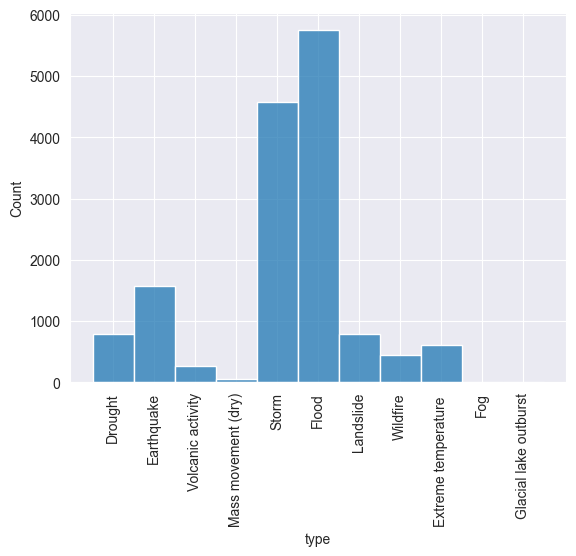

In [43]:
hist = sns.histplot(data=dis_global, x="type")
hist.tick_params(axis='x', rotation=90)
plt.show()

Storms and Floods occur by far the most often while disasters like droughts, earthquakes occur fewer times.
The other types of disasters are very rare with only 3 recorded observations of glacial lake outbursts.
Living next to the water seems to be dangerous !

Which types of natural disasters cause the most deaths ?

In [44]:
dis_deaths_by_type = dis_global.groupby(["type"])
dis_deaths_by_type = dis_deaths_by_type.sum(numeric_only=True).drop("year", axis=1)
dis_deaths_by_type

,deaths
type,
Drought,11733889
Earthquake,2343912
Extreme temperature,194056
Flood,7002992
Fog,4000
Glacial lake outburst,262
Landslide,67477
Mass movement (dry),4644
Storm,1403609


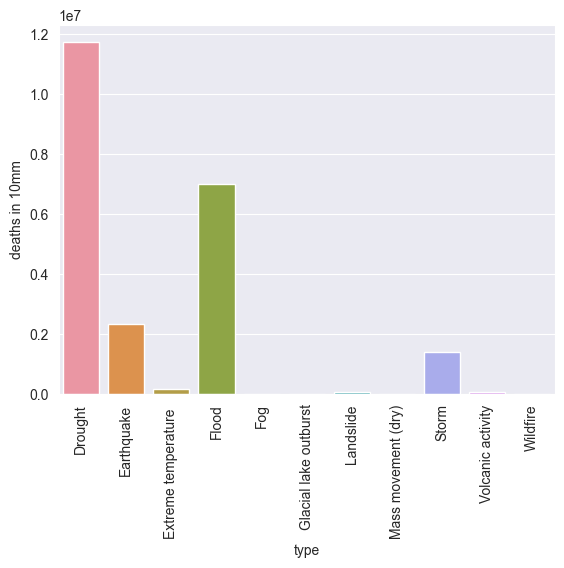

In [45]:
barplot = sns.barplot(data=dis_deaths_by_type.reset_index(), x="type", y="deaths")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("deaths in 10mm")
plt.show()

As expected the cumulative deaths by flood are high with around 7 million people dying in the last 100 years.
The most significant insight here is that droughts have the highest death toll of all disasters with almost 11 mio people dying in the same timeframe. This is remarkable since droughts were only the fifth most common disaster. Storms, which occurred almost als often as floods have a relatively low death toll and are even superseded by the number of people dying from earthquakes.

The lethality of droughts is the most surprising or in this case shocking point.
More people dyed from droughts, probably following week long starvation, than from all other disasters combined.
There is one caveat though: Droughts are not necessarily the result of natural events but rather can be and have been caused by political failure or even have been weaponized by states.

We can also indentify the following types as the main contributors to human deaths by natural disasters:

- Drought
- Flood
- Earthquake
- Storm

We will take a closer look at those types of disasters in the following.


So lets see what the most lethal disasters of the last one hundred years have been

In [46]:
dis_global.sort_values(by="deaths", ascending = False).drop("subtype", axis=1).head(10)

,year,type,deaths
95,1931,Flood,3700000
81,1928,Drought,3000000
272,1959,Flood,2000000
137,1943,Drought,1900000
354,1965,Drought,1500000
130,1942,Drought,1500000
1,1900,Drought,1250000
849,1921,Drought,1200000
123,1939,Flood,500000
48,1920,Drought,500000


The 10 most lethal disasters from the last 100 years have exclusively been floods and droughts.

The number one spot is a flood which happened 1931 in China and is known as one of the deadliest disasters of all time.

## Changes over time

### Frequeny

How did the frequency of natural disasters change over time ?

In [66]:
dis_freq_per_year = dis_global.groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_freq_per_year.rename(columns={'type':'recorded disasters'}, inplace=True)

In [67]:
dis_freq_per_year.head(25)

,recorded disasters
year,
1900,6
1901,1
1902,10
1903,12
1904,4
1905,8
1906,13
1907,2
1908,3


In [68]:
dis_freq_per_year.tail(8)

,recorded disasters
year,
2015,384
2016,324
2017,344
2018,320
2019,396
2020,395
2021,430
2022,340


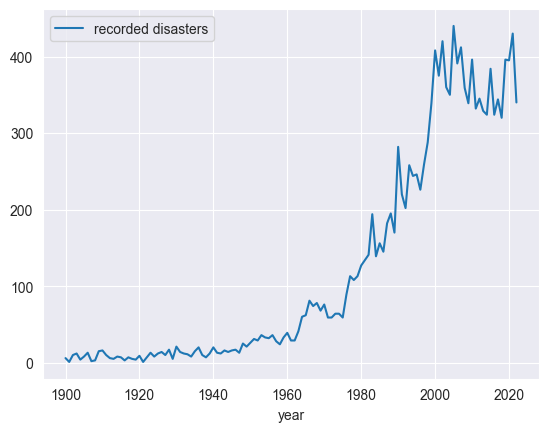

In [50]:
sns.lineplot(data = dis_freq_per_year)
plt.show()

We can clearly see that the number of recorded disasters skyrocketed over the last 100 years.
This is most likely not because there are this much more disasters happening (which affected people), but rather due to states or other institutions increasing their monitoring and taking recording of natural disasters seriously.

### Death toll

In [60]:
dis_deaths_per_year = dis_global.groupby('year').sum(numeric_only=True)

In [71]:
dis_deaths_per_year.head(8)

,deaths
year,
1900,1261000
1903,0
1906,0
1910,85000
1919,0
1920,524000
1921,1200000
1928,3000000


In [62]:
dis_deaths_per_year.tail(8)

,deaths
year,
2015,22874
2016,8356
2017,9766
2018,11781
2019,11943
2020,15117
2021,10532
2022,13503


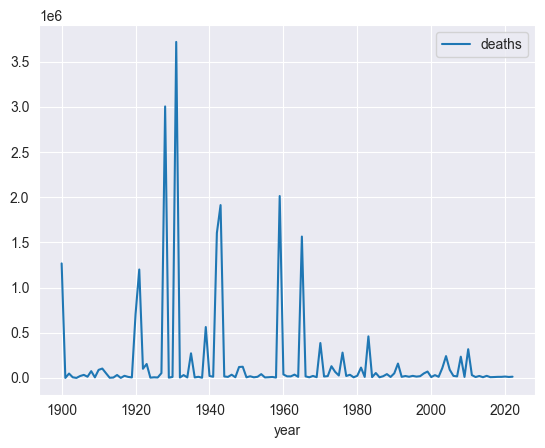

In [63]:
sns.lineplot(data = dis_deaths_per_year)
plt.show()

This is unexpected. We saw that the frequency of recorded disasters increased strongly over the past 100 years.
But number of people dying from natural disasters certainly has not.
We can also see that those are not linear trends. In certain periods of time, disasters seem to occur that have a dramatically high death toll like in the 1920s-1940s and the 1960s. Other periods like the 1950s have almost no recorded deaths (compared to the significant ones). After that 1960s the recorded deaths per year never came close to that, with only minor spikes occurring in the 2000s.

The 1920s-1940s can maybe be explained due to historic events and their consequences, like the two world wars, the great depression and political systems collapsing all around the world.

For the major disasters happening in the 1960s it is not that obvious to come up with a causal reasoning.
This requires further research.

It is safe to say that humanity as a whole has improved significantly in preventing disasters with a death toll in the millions.

When comparing the deaths by disasters on a normal scale, to see trends, it might be a good idea to exclude those major disasters.

Are there differences in the number of recorded incidents and deaths for different types of disasters ?

### Droughts

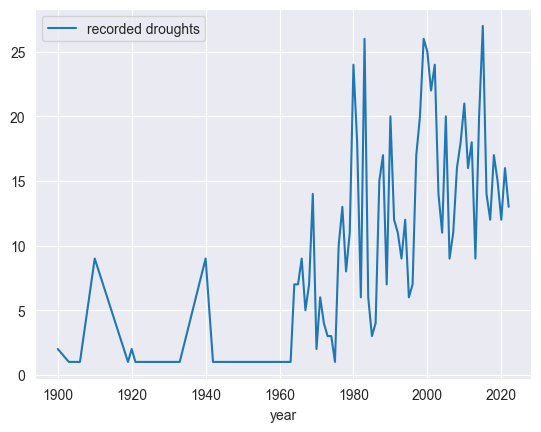

In [52]:
dis_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_droughts_per_year.rename(columns={'type':'recorded droughts'}, inplace=True)
sns.lineplot(data = dis_droughts_per_year)
plt.show()

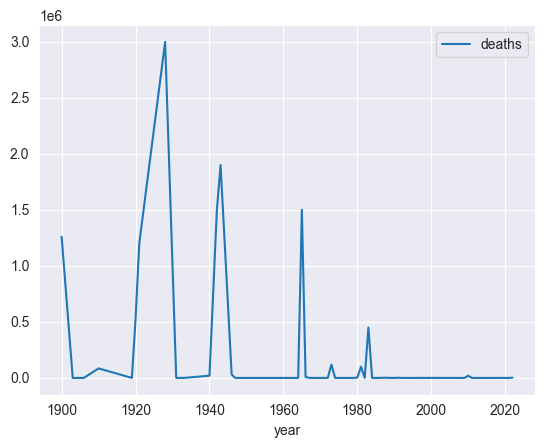

In [72]:
dis_deaths_by_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_droughts_per_year)
plt.show()

The number of recorded droughts has increases but the number of recorded deaths has decreased.
In 40 years no drought has really caused a significant amount of deaths.

In the 1920s and the early 1940s extremely lethal droughts occurred.
This is also what we saw previously.

### Floods

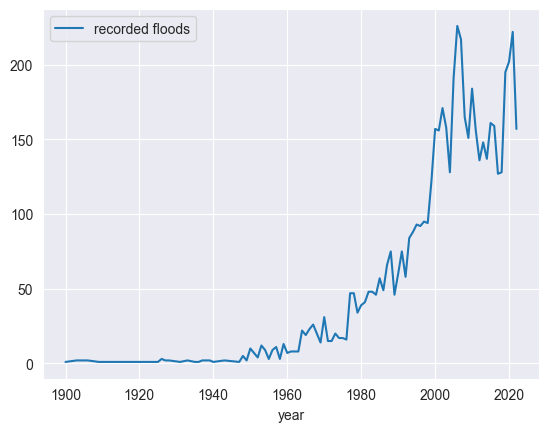

In [53]:
dis_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_floods_per_year.rename(columns={'type':'recorded floods'}, inplace=True)
sns.lineplot(data = dis_floods_per_year)
plt.show()

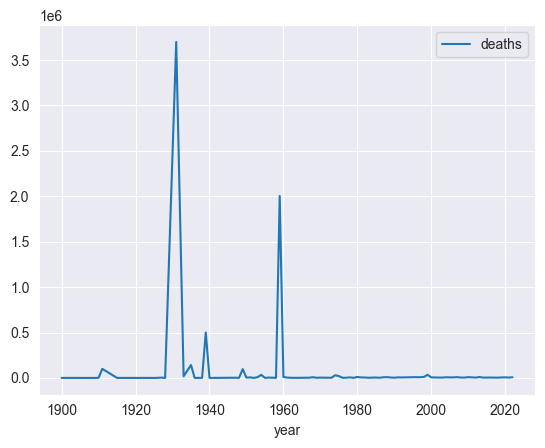

In [73]:
dis_deaths_by_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_floods_per_year)
plt.show()

The number of recorded incidents of floods are increasing, like for the other types or recorded disasters in general.
We can see that the most lethal floods have occurred in the early 1930s (e.g. China-Flood) as well as the early 1960s.

Unlike the other types of disaster, floods do not cause a high number of humans lives in other periods, with the annual death toll being negligible for other time spans.
Since the 1960s no flood has ever caused a high number of human casualties again.
This might be due to more modern ways of predicting floods earlier as well as people being cautious to live in areas where floods are likely and lethal.

### Earthquakes

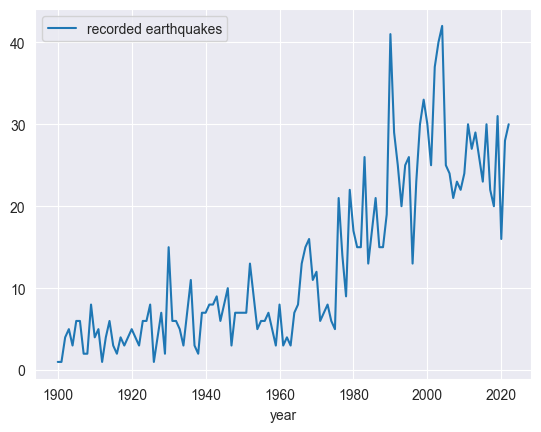

In [54]:
dis_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_earthquakes_per_year.rename(columns={'type':'recorded earthquakes'}, inplace=True)
sns.lineplot(data = dis_earthquakes_per_year)
plt.show()

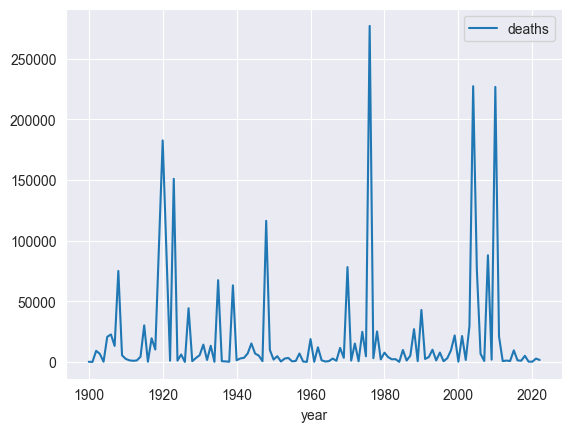

In [74]:
dis_deaths_by_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_earthquakes_per_year)
plt.show()

The frequency of all recorded disaster has drastically increased over the last 100 years, but earthquakes seem to be the one disaster type people have been reasonably tracking even in the first part of the 19th century.
It still increased, but not as drastically as the other ones.

The recorded deaths per year spiked again in the 1920s, like almost all other types of disasters but also in the late 1970s and the 2000s.

Here we can see that the spikes in deaths we saw earlier in the 2000s probably are caused by those earthquakes.
A reason might be that droughts and floods are easier to prevent with modern technology or global aid programs, while earthquakes are more difficult to prevent even in our modern world.
They are still nowhere nearly as deadly as the floods and droughts 50 years earlier have been.

### Storms

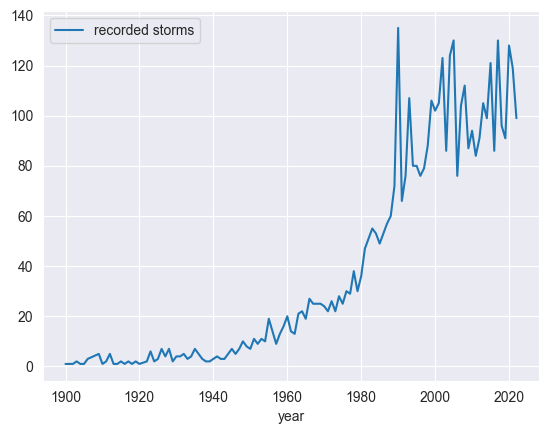

In [55]:
dis_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_storms_per_year.rename(columns={'type':'recorded storms'}, inplace=True)
sns.lineplot(data = dis_storms_per_year)
plt.show()

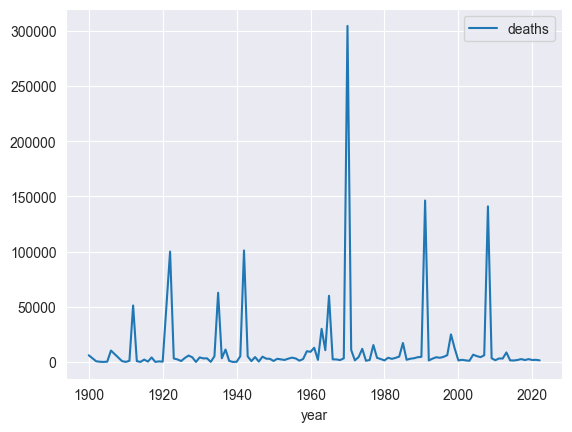

In [75]:
dis_deaths_by_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_storms_per_year)
plt.show()

Like all disasters, the number of recorded storms has drastically increased over the past 100 years.
Noticeable is that the recorded deaths by storms seem to be the most consistent over the years.
Looking at the plot we can see that roughly every 20 years storms occurs which cause a great amount of human casualties.
Maybe this can be linked to the periodical behaviour of storms such as El Niño.

Significant is also the storm in the 1970s which has by far the highest death toll.
Let us take a closer look at this one.

In [77]:
dis_deaths_by_droughts_per_year.sort_values(by="deaths", ascending = False).head()

,deaths
year,
1970,304495
1991,146297
2008,140985
1942,101000
1922,100000


This disaster was a storm named the "1970 Bhola cyclone", also known as the "Great Cyclone of 1970" and was a tropcial cyclone that hit East-Pakistan (present-day Bangladesh) and parts of India. It killed as much as 3 million people and went down in history as one of the deadliest natural disasters of all time.
It was the strongest cyclonic storm of the 1970 North Indian Ocean cyclone season.